In [49]:
% clear
%pylab inline
import h5py
import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [34]:
with h5py.File("/scratch/fhgfs/alberto/test/gmd.h5",'r') as f:
    gmd = f['/cheetah/event_data/gmd1/'][:]

with h5py.File("/scratch/fhgfs/alberto/test/baglivo_score.h5",'r') as f:
    baglivo = f['data'][:]

with h5py.File("/scratch/fhgfs/alberto/test/photon_space_frames_column.h5",'r') as f:
    misses_ind = f['indices1'][:].astype('bool')
    
with h5py.File("/scratch/fhgfs/alberto/test/photon_space_frames_column.h5",'r') as f:
    fittedphc = f['fitv_sample'][:]
    realphc = f['photon_count_per_frame'][:]

# Information on misses
gmd_misses = gmd[misses_ind]
bag_misses = baglivo[misses_ind]
    
fittedphc_misses = fittedphc[misses_ind]
realphc_misses = realphc[misses_ind]

In [35]:
def exclude_out(realphc,gmd,bscore):
    index = (realphc>400)*(gmd>1)*(bscore>1)
    return index

def normalized_scores(fittedphc_bkg,baglivo_bkg,fitphc,bscore,ib,ii):
    linfit = polyfit(fittedphc_bkg[ib],baglivo_bkg[ib],1)
    x_values_bag = linfit[0]*fitphc + linfit[1]
    y_norm = bscore[ii] - x_values_bag[ii]
    return y_norm, fitphc[ii]

In [36]:
ii_tot = exclude_out(realphc,gmd,baglivo)
ii_b = exclude_out(realphc_misses,gmd_misses,bag_misses)

Y_BKG, X_BKG = normalized_scores(fittedphc_misses,bag_misses,fittedphc_misses,bag_misses,ii_b,ii_b)
Y_TOT, X_TOT = normalized_scores(fittedphc_misses,bag_misses,fittedphc,baglivo,ii_b,ii_tot)

False Positive rate 0.176467782706 %


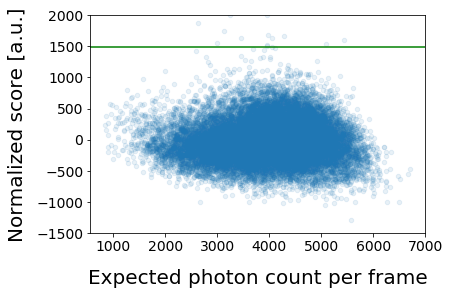

In [50]:
thr = Y_BKG[X_BKG>800].mean() + 4*Y_BKG[X_BKG>800].std()
figure()
scatter(X_BKG,Y_BKG,alpha=0.1,s=20)
xlabel(r'Expected photon count per frame',fontsize=20, labelpad=15) 
ylabel(r'Normalized score [a.u.]',fontsize=20, labelpad=10)
tick_params(labelsize=14)
ylim([-1500,2000])
axhline(thr,color='green')

print "False Positive rate",(100*Y_BKG[Y_BKG>thr].shape[0]/float(Y_BKG.shape[0])),"%"